In [1]:
## import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
df = pd.read_csv('F:\mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


UNIVARIATE ANALYSIS

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

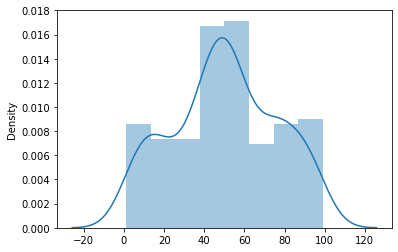

In [3]:
sns.distplot(x=df['Spending Score (1-100)'])

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

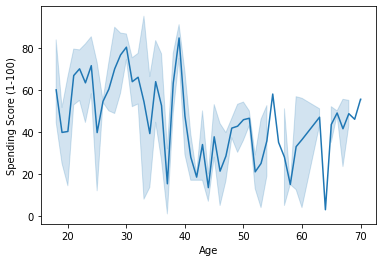

In [4]:
sns.lineplot(x=df['Age'],y=df['Spending Score (1-100)'])

Multivariate Analysis

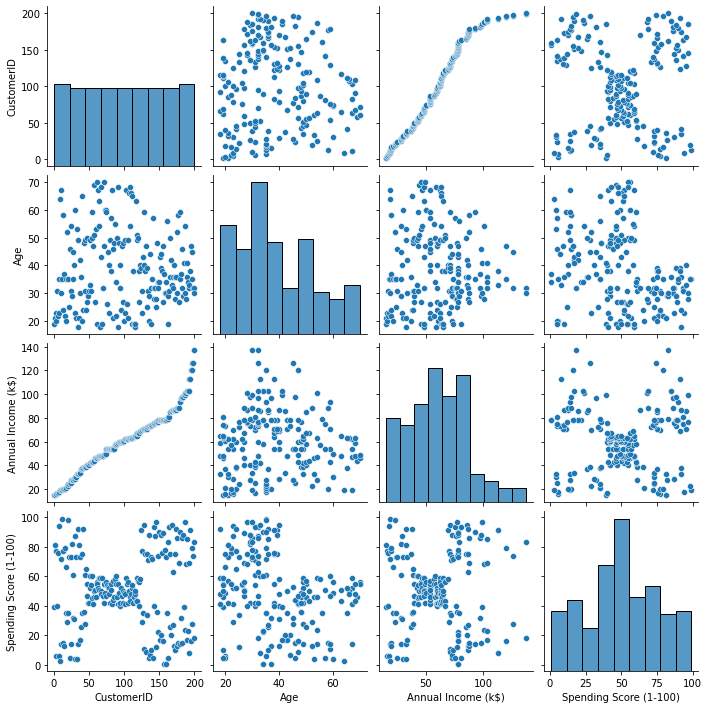

In [5]:
sns.pairplot(df)

<AxesSubplot:>

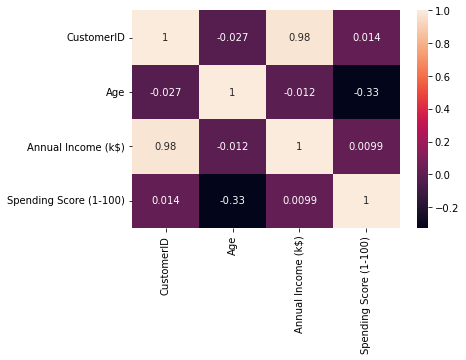

In [6]:
sns.heatmap(df.corr(),annot=True)

Descriptive Analysis

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Detecting Null Values

In [8]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

Outlier Detection

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

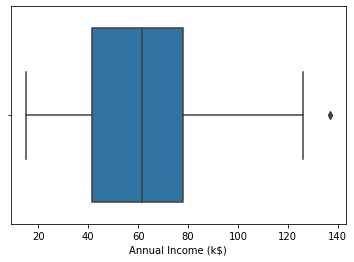

In [9]:
sns.boxplot(df['Annual Income (k$)'])

Outlier Replacement

In [10]:
df.median()

C:\Users\DELL\AppData\Local\Temp\ipykernel_15392\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [11]:
Q1= df['Annual Income (k$)'].quantile(0.25)
Q3=df['Annual Income (k$)'].quantile(0.75)

In [12]:
IQR=Q3-Q1

In [13]:
upper_limit =Q3 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR

In [14]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper_limit,62,df['Annual Income (k$)'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

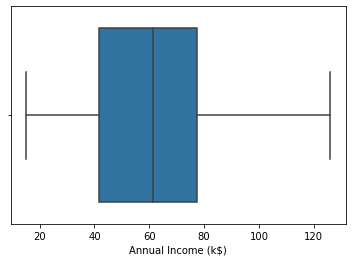

In [15]:
sns.boxplot(df['Annual Income (k$)'])

Encoding Techniques
Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [18]:
df.Gender = le.fit_transform(df.Gender)

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


X and y split

In [20]:
# independent varibles-X

X=df.drop(columns=['Spending Score (1-100)'],axis=1)
X.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,15
1,2,1,21,15
2,3,0,20,16
3,4,0,23,16
4,5,0,31,17


In [21]:
# y target-dependent variable


y=df['Spending Score (1-100)']
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

Scaling

In [22]:
from sklearn.preprocessing import scale

In [23]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.788949
1,-1.706091,1.128152,-1.281035,-1.788949
2,-1.688771,-0.886405,-1.352802,-1.749026
3,-1.671450,-0.886405,-1.137502,-1.749026
4,-1.654129,-0.886405,-0.563369,-1.709103


Clustering Algorithm

In [24]:
from sklearn import cluster

In [25]:
error =[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X_scaled)
    error.append(kmeans.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
error

[800.0,
 513.706463737165,
 385.282896972378,
 289.86403522977497,
 230.88151614164536,
 184.20022337532495,
 152.89475632371247,
 135.86217642868976,
 124.08956970516027,
 112.45080625957509]

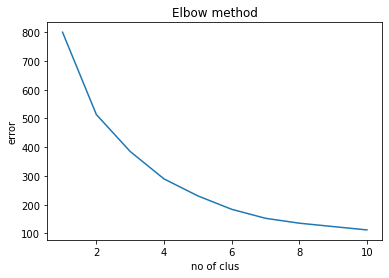

In [27]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no of clus')
plt.ylabel('error')
plt.show()

In [28]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [29]:
km_model.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [32]:
ykmeans =km_model.predict(X_scaled)
ykmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [33]:
km_model.predict([[5.1,3.5,1.4,0.2]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

Add the cluster data with the primary dataset

In [34]:
X_scaled['kclus'] = pd.Series(ykmeans) # Adding the cluster data with the primary dataset

In [35]:
X_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),kclus
0,-1.723412,1.128152,-1.424569,-1.788949,2
1,-1.706091,1.128152,-1.281035,-1.788949,2
2,-1.688771,-0.886405,-1.352802,-1.749026,2
3,-1.671450,-0.886405,-1.137502,-1.749026,2
4,-1.654129,-0.886405,-0.563369,-1.709103,2


Split the data into dependent and independent
variables

In [36]:
x=X_scaled.iloc[:,:-1]
x                           # Split the data into dependent and independent variables.

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.788949
1,-1.706091,1.128152,-1.281035,-1.788949
2,-1.688771,-0.886405,-1.352802,-1.749026
3,-1.671450,-0.886405,-1.137502,-1.749026
4,-1.654129,-0.886405,-0.563369,-1.709103
...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.402964
196,1.671450,-0.886405,0.441365,2.642502
197,1.688771,1.128152,-0.491602,2.642502
198,1.706091,1.128152,-0.491602,0.087431


In [37]:
Y=X_scaled.kclus

Train test split

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state = 1)

In [39]:
x_train

,CustomerID,Gender,Age,Annual Income (k$)
108,0.147226,1.128152,2.091999,0.127354
107,0.129905,1.128152,1.087265,0.127354
189,1.550205,-0.886405,-0.204535,1.724273
14,-1.480922,1.128152,-0.132768,-1.589334
56,-0.753452,-0.886405,0.871965,-0.631182
...,...,...,...,...
133,0.580244,-0.886405,-0.563369,0.486661
137,0.649527,1.128152,-0.491602,0.526584
72,-0.476320,-0.886405,1.517865,-0.391644
140,0.701489,-0.886405,1.302565,0.606430


In [40]:
x_train.shape

(160, 4)

In [41]:
y_train.shape

(160,)

In [42]:
x_test

,CustomerID,Gender,Age,Annual Income (k$)
58,-0.718810,-0.886405,-0.850435,-0.551336
40,-1.030583,-0.886405,1.876699,-0.870720
34,-1.134507,-0.886405,0.728432,-1.070335
102,0.043302,1.128152,2.020232,0.087431
184,1.463601,-0.886405,0.154298,1.564582
198,1.706091,1.128152,-0.491602,0.087431
95,-0.077943,1.128152,-1.065735,0.007585
4,-1.654129,-0.886405,-0.563369,-1.709103
29,-1.221111,-0.886405,-1.137502,-1.230027
168,1.186470,-0.886405,-0.204535,1.085506


In [43]:
x_test.shape

(40, 4)

Build the model

In [44]:
# model building 
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(n_estimators=15,max_depth=3)

In [45]:
#Fit the model
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=15)

In [46]:
test_pred = model.predict(x_test)

In [47]:
train_pred = model.predict(x_train)

Evaluate the model

In [51]:
# evaluating the model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

Train the model

In [53]:
print('Training accuracy: ',accuracy_score(y_train,train_pred))

Training accuracy:  0.9875


Test the Model

In [54]:
print('Testing accuracy: ' , accuracy_score(y_test,test_pred))


Testing accuracy:  0.975


Evaluation Metrics

In [55]:
pd.crosstab(y_test,test_pred)

col_0,0,1,2
kclus,,,
0,14,0,1
1,0,10,0
2,0,0,15


In [56]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       1.00      1.00      1.00        10
           2       0.94      1.00      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.98        40
weighted avg       0.98      0.97      0.97        40

